In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

Loading the Data from Mnist datasets using a function

In [6]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

  ## converting x_train images from (28*28) to 784 dimensions
    x_train = (x_train.astype(np.float32) - 127.5)/127.5

    x_train = x_train.reshape(60000, 784)

    return (x_train, y_train, x_test, y_test)

(X_train, y_train, X_test, y_test) = load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)


Function for Optimizer, Here we will be using Adam Optimizer

In [7]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

GENERATOR architecture using MLP with dense layers activated by tanh activation

In [8]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=256, input_dim = 100))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=784, activation='tanh'))

    generator.compile(loss='binary_crossentropy',optimizer = adam_optimizer())

    return generator

g = create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

DISCRIMINATOR architecture using MLP with dense layers

In [9]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=1024, input_dim = 784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(units=1, activation='sigmoid'))

    discriminator.compile(loss= 'binary_crossentropy', optimizer = adam_optimizer())

    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

Now we  will combine the generator and the discriminator to form a GAN architecture

In [14]:
def create_gan(discriminator, generator):
    
  ## we are firstly fixing the discriminator
    discriminator.trainable = False
  
  ## creating the input of shape 100 for the discriminator
    gan_input = Input(shape=(100,))

  ## giving this input to the generator
    x = generator(gan_input)

  ## x is the output generated from the generator
    gan_output = discriminator(x)

  ## GAN model
    gan = Model(inputs=gan_input, outputs=gan_output)

    gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')

    return gan

gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


Function for plotting the generated Images

In [24]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise = np.random.normal(loc=0, scale=1, size=[examples,100])
  
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100, 28, 28)

    plt.figure(figsize=figsize)

    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

Start to train GANS

  0%|          | 0/128 [00:00<?, ?it/s]

epochs 1


  2%|▏         | 3/128 [00:00<00:05, 22.34it/s]

epochs 2


  2%|▏         | 3/128 [00:00<00:05, 23.13it/s]

epochs 3


  2%|▏         | 3/128 [00:00<00:05, 21.46it/s]

epochs 4


  2%|▏         | 3/128 [00:00<00:05, 22.51it/s]

epochs 5


  2%|▏         | 3/128 [00:00<00:05, 24.24it/s]

epochs 6


  2%|▏         | 3/128 [00:00<00:05, 23.50it/s]

epochs 7


  2%|▏         | 3/128 [00:00<00:05, 20.90it/s]

epochs 8


  2%|▏         | 3/128 [00:00<00:05, 23.51it/s]

epochs 9


  2%|▏         | 3/128 [00:00<00:05, 24.13it/s]

epochs 10


  2%|▏         | 3/128 [00:00<00:05, 22.96it/s]

epochs 11


  2%|▏         | 3/128 [00:00<00:05, 23.23it/s]

epochs 12


  2%|▏         | 3/128 [00:00<00:05, 23.90it/s]

epochs 13


  2%|▏         | 3/128 [00:00<00:05, 24.22it/s]

epochs 14


  2%|▏         | 3/128 [00:00<00:05, 23.71it/s]

epochs 15


  2%|▏         | 3/128 [00:00<00:05, 23.09it/s]

epochs 16


  2%|▏         | 2/128 [00:00<00:06, 19.95it/s]

epochs 17


  2%|▏         | 3/128 [00:00<00:05, 23.29it/s]

epochs 18


  2%|▏         | 3/128 [00:00<00:05, 22.82it/s]

epochs 19


  2%|▏         | 3/128 [00:00<00:05, 23.00it/s]

epochs 20


  0%|          | 0/128 [00:00<?, ?it/s]

epochs 21


  2%|▏         | 3/128 [00:00<00:05, 23.61it/s]

epochs 22


  2%|▏         | 3/128 [00:00<00:05, 23.07it/s]

epochs 23


  2%|▏         | 3/128 [00:00<00:05, 22.53it/s]

epochs 24


  2%|▏         | 3/128 [00:00<00:05, 22.03it/s]

epochs 25


  2%|▏         | 3/128 [00:00<00:05, 21.88it/s]

epochs 26


  2%|▏         | 3/128 [00:00<00:05, 23.56it/s]

epochs 27


  2%|▏         | 3/128 [00:00<00:05, 23.62it/s]

epochs 28


  2%|▏         | 3/128 [00:00<00:05, 22.64it/s]

epochs 29


  2%|▏         | 3/128 [00:00<00:05, 23.47it/s]

epochs 30


  2%|▏         | 3/128 [00:00<00:05, 23.60it/s]

epochs 31


  2%|▏         | 3/128 [00:00<00:05, 21.34it/s]

epochs 32


  2%|▏         | 3/128 [00:00<00:05, 23.10it/s]

epochs 33


  2%|▏         | 3/128 [00:00<00:05, 23.87it/s]

epochs 34


  2%|▏         | 3/128 [00:00<00:05, 22.10it/s]

epochs 35


  2%|▏         | 3/128 [00:00<00:05, 23.12it/s]

epochs 36


  2%|▏         | 3/128 [00:00<00:05, 22.93it/s]

epochs 37


  2%|▏         | 3/128 [00:00<00:05, 23.22it/s]

epochs 38


  2%|▏         | 3/128 [00:00<00:05, 23.77it/s]

epochs 39


  2%|▏         | 3/128 [00:00<00:05, 22.69it/s]

epochs 40


  2%|▏         | 3/128 [00:00<00:05, 23.09it/s]

epochs 41


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

epochs 42


  2%|▏         | 3/128 [00:00<00:05, 22.74it/s]

epochs 43


  2%|▏         | 3/128 [00:00<00:05, 23.48it/s]

epochs 44


  2%|▏         | 2/128 [00:00<00:06, 19.98it/s]

epochs 45


  2%|▏         | 3/128 [00:00<00:05, 22.56it/s]

epochs 46


  2%|▏         | 3/128 [00:00<00:05, 24.39it/s]

epochs 47


  2%|▏         | 3/128 [00:00<00:05, 23.26it/s]

epochs 48


  2%|▏         | 2/128 [00:00<00:06, 19.70it/s]

epochs 49


  2%|▏         | 3/128 [00:00<00:05, 23.05it/s]

epochs 50


  2%|▏         | 3/128 [00:00<00:05, 23.71it/s]

epochs 51


  2%|▏         | 3/128 [00:00<00:05, 22.44it/s]

epochs 52


  2%|▏         | 3/128 [00:00<00:05, 23.07it/s]

epochs 53


  2%|▏         | 3/128 [00:00<00:05, 23.93it/s]

epochs 54


  2%|▏         | 3/128 [00:00<00:05, 22.67it/s]

epochs 55


  2%|▏         | 3/128 [00:00<00:05, 22.21it/s]

epochs 56


  2%|▏         | 3/128 [00:00<00:06, 20.80it/s]

epochs 57


  2%|▏         | 3/128 [00:00<00:05, 23.24it/s]

epochs 58


  2%|▏         | 3/128 [00:00<00:05, 22.13it/s]

epochs 59


  2%|▏         | 3/128 [00:00<00:05, 23.10it/s]

epochs 60


  2%|▏         | 2/128 [00:00<00:06, 19.41it/s]

epochs 61


  2%|▏         | 3/128 [00:00<00:05, 22.87it/s]

epochs 62


  2%|▏         | 3/128 [00:00<00:05, 23.54it/s]

epochs 63


  2%|▏         | 3/128 [00:00<00:05, 23.54it/s]

epochs 64


  2%|▏         | 3/128 [00:00<00:05, 23.12it/s]

epochs 65


  2%|▏         | 3/128 [00:00<00:05, 21.70it/s]

epochs 66


  2%|▏         | 3/128 [00:00<00:05, 23.27it/s]

epochs 67


  2%|▏         | 3/128 [00:00<00:05, 23.39it/s]

epochs 68


  2%|▏         | 3/128 [00:00<00:05, 23.84it/s]

epochs 69


  2%|▏         | 3/128 [00:00<00:05, 23.61it/s]

epochs 70


  2%|▏         | 3/128 [00:00<00:05, 22.68it/s]

epochs 71


  2%|▏         | 3/128 [00:00<00:05, 23.60it/s]

epochs 72


  2%|▏         | 3/128 [00:00<00:05, 23.79it/s]

epochs 73


  2%|▏         | 3/128 [00:00<00:05, 22.26it/s]

epochs 74


  2%|▏         | 3/128 [00:00<00:05, 23.68it/s]

epochs 75


  2%|▏         | 3/128 [00:00<00:05, 23.08it/s]

epochs 76


  2%|▏         | 3/128 [00:00<00:06, 20.64it/s]

epochs 77


  2%|▏         | 3/128 [00:00<00:05, 23.06it/s]

epochs 78


  2%|▏         | 3/128 [00:00<00:05, 23.93it/s]

epochs 79


  2%|▏         | 3/128 [00:00<00:05, 23.00it/s]

epochs 80


  2%|▏         | 3/128 [00:00<00:05, 22.94it/s]

epochs 81


  2%|▏         | 3/128 [00:00<00:05, 22.97it/s]

epochs 82


  2%|▏         | 3/128 [00:00<00:05, 23.78it/s]

epochs 83


  2%|▏         | 3/128 [00:00<00:05, 22.62it/s]

epochs 84


  2%|▏         | 3/128 [00:00<00:05, 22.05it/s]

epochs 85


  2%|▏         | 3/128 [00:00<00:05, 22.43it/s]

epochs 86


  2%|▏         | 3/128 [00:00<00:05, 23.99it/s]

epochs 87


  2%|▏         | 3/128 [00:00<00:05, 23.63it/s]

epochs 88


  2%|▏         | 3/128 [00:00<00:05, 21.81it/s]

epochs 89


  2%|▏         | 3/128 [00:00<00:05, 23.17it/s]

epochs 90


  2%|▏         | 3/128 [00:00<00:05, 23.14it/s]

epochs 91


  2%|▏         | 3/128 [00:00<00:05, 22.23it/s]

epochs 92


  2%|▏         | 3/128 [00:00<00:05, 22.73it/s]

epochs 93


  2%|▏         | 3/128 [00:00<00:05, 23.26it/s]

epochs 94


  2%|▏         | 3/128 [00:00<00:05, 23.63it/s]

epochs 95


  2%|▏         | 3/128 [00:00<00:05, 23.79it/s]

epochs 96


  2%|▏         | 3/128 [00:00<00:05, 24.02it/s]

epochs 97


  2%|▏         | 3/128 [00:00<00:05, 22.52it/s]

epochs 98


  2%|▏         | 3/128 [00:00<00:05, 22.00it/s]

epochs 99


  2%|▏         | 3/128 [00:00<00:05, 22.20it/s]

epochs 100


  2%|▏         | 3/128 [00:00<00:05, 23.32it/s]

epochs 101


  2%|▏         | 3/128 [00:00<00:05, 23.69it/s]

epochs 102


  2%|▏         | 3/128 [00:00<00:05, 23.04it/s]

epochs 103


  2%|▏         | 3/128 [00:00<00:05, 22.64it/s]

epochs 104


  2%|▏         | 3/128 [00:00<00:05, 24.12it/s]

epochs 105


  2%|▏         | 3/128 [00:00<00:05, 23.03it/s]

epochs 106


  2%|▏         | 3/128 [00:00<00:05, 23.06it/s]

epochs 107


  2%|▏         | 3/128 [00:00<00:05, 21.62it/s]

epochs 108


  2%|▏         | 3/128 [00:00<00:05, 23.73it/s]

epochs 109


  2%|▏         | 3/128 [00:00<00:05, 21.83it/s]

epochs 110


  2%|▏         | 3/128 [00:00<00:05, 22.78it/s]

epochs 111


  2%|▏         | 3/128 [00:00<00:05, 22.81it/s]

epochs 112


  2%|▏         | 3/128 [00:00<00:05, 23.21it/s]

epochs 113


  2%|▏         | 3/128 [00:00<00:05, 24.17it/s]

epochs 114


  2%|▏         | 3/128 [00:00<00:05, 23.67it/s]

epochs 115


  2%|▏         | 3/128 [00:00<00:05, 22.73it/s]

epochs 116


  2%|▏         | 3/128 [00:00<00:05, 22.69it/s]

epochs 117


  2%|▏         | 3/128 [00:00<00:05, 23.25it/s]

epochs 118


  2%|▏         | 3/128 [00:00<00:05, 24.36it/s]

epochs 119


  2%|▏         | 3/128 [00:00<00:05, 21.32it/s]

epochs 120


  2%|▏         | 3/128 [00:00<00:05, 22.69it/s]

epochs 121


  2%|▏         | 3/128 [00:00<00:05, 22.69it/s]

epochs 122


  2%|▏         | 3/128 [00:00<00:05, 22.02it/s]

epochs 123


  2%|▏         | 2/128 [00:00<00:06, 19.69it/s]

epochs 124


  2%|▏         | 3/128 [00:00<00:05, 22.05it/s]

epochs 125


  2%|▏         | 3/128 [00:00<00:05, 22.68it/s]

epochs 126


  2%|▏         | 3/128 [00:00<00:05, 22.41it/s]

epochs 127


  2%|▏         | 3/128 [00:00<00:05, 23.11it/s]

epochs 128


  2%|▏         | 3/128 [00:00<00:05, 23.46it/s]

epochs 129


  2%|▏         | 3/128 [00:00<00:05, 23.25it/s]

epochs 130


  2%|▏         | 3/128 [00:00<00:05, 22.74it/s]

epochs 131


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

epochs 132


  2%|▏         | 3/128 [00:00<00:05, 23.27it/s]

epochs 133


  2%|▏         | 3/128 [00:00<00:05, 22.00it/s]

epochs 134


  2%|▏         | 3/128 [00:00<00:05, 21.43it/s]

epochs 135


  2%|▏         | 3/128 [00:00<00:05, 22.58it/s]

epochs 136


  2%|▏         | 3/128 [00:00<00:05, 23.15it/s]

epochs 137


  2%|▏         | 3/128 [00:00<00:05, 22.56it/s]

epochs 138


  2%|▏         | 3/128 [00:00<00:05, 22.74it/s]

epochs 139


  2%|▏         | 3/128 [00:00<00:05, 21.75it/s]

epochs 140


  2%|▏         | 3/128 [00:00<00:05, 22.58it/s]

epochs 141


  2%|▏         | 3/128 [00:00<00:05, 24.18it/s]

epochs 142


  2%|▏         | 3/128 [00:00<00:05, 22.53it/s]

epochs 143


  2%|▏         | 3/128 [00:00<00:05, 21.65it/s]

epochs 144


  2%|▏         | 3/128 [00:00<00:05, 22.61it/s]

epochs 145


  2%|▏         | 3/128 [00:00<00:05, 21.37it/s]

epochs 146


  2%|▏         | 3/128 [00:00<00:05, 22.75it/s]

epochs 147


  2%|▏         | 3/128 [00:00<00:05, 21.65it/s]

epochs 148


  2%|▏         | 3/128 [00:00<00:05, 24.03it/s]

epochs 149


  2%|▏         | 3/128 [00:00<00:06, 20.58it/s]

epochs 150


  2%|▏         | 3/128 [00:00<00:05, 22.82it/s]

epochs 151


  2%|▏         | 3/128 [00:00<00:05, 23.11it/s]

epochs 152


  2%|▏         | 3/128 [00:00<00:05, 22.42it/s]

epochs 153


  2%|▏         | 3/128 [00:00<00:05, 22.56it/s]

epochs 154


  2%|▏         | 3/128 [00:00<00:05, 23.91it/s]

epochs 155


  2%|▏         | 3/128 [00:00<00:05, 23.24it/s]

epochs 156


  2%|▏         | 3/128 [00:00<00:05, 22.81it/s]

epochs 157


  2%|▏         | 3/128 [00:00<00:05, 23.58it/s]

epochs 158


  2%|▏         | 3/128 [00:00<00:05, 23.30it/s]

epochs 159


  2%|▏         | 2/128 [00:00<00:06, 19.52it/s]

epochs 160


  2%|▏         | 3/128 [00:00<00:05, 22.72it/s]

epochs 161


  2%|▏         | 3/128 [00:00<00:05, 23.01it/s]

epochs 162


  2%|▏         | 3/128 [00:00<00:05, 23.70it/s]

epochs 163


  2%|▏         | 3/128 [00:00<00:05, 22.21it/s]

epochs 164


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

epochs 165


  2%|▏         | 3/128 [00:00<00:05, 23.01it/s]

epochs 166


  2%|▏         | 3/128 [00:00<00:05, 23.94it/s]

epochs 167


  2%|▏         | 3/128 [00:00<00:05, 21.09it/s]

epochs 168


  2%|▏         | 3/128 [00:00<00:05, 22.31it/s]

epochs 169


  2%|▏         | 3/128 [00:00<00:05, 23.65it/s]

epochs 170


  2%|▏         | 3/128 [00:00<00:05, 22.92it/s]

epochs 171


  2%|▏         | 3/128 [00:00<00:05, 22.71it/s]

epochs 172


  2%|▏         | 3/128 [00:00<00:05, 23.36it/s]

epochs 173


  2%|▏         | 3/128 [00:00<00:05, 23.70it/s]

epochs 174


  2%|▏         | 3/128 [00:00<00:05, 22.24it/s]

epochs 175


  2%|▏         | 3/128 [00:00<00:05, 21.43it/s]

epochs 176


  2%|▏         | 3/128 [00:00<00:05, 22.05it/s]

epochs 177


  2%|▏         | 3/128 [00:00<00:05, 23.12it/s]

epochs 178


  2%|▏         | 3/128 [00:00<00:05, 22.89it/s]

epochs 179


  2%|▏         | 3/128 [00:00<00:05, 23.34it/s]

epochs 180


  2%|▏         | 3/128 [00:00<00:05, 21.52it/s]

epochs 181


  2%|▏         | 3/128 [00:00<00:05, 22.54it/s]

epochs 182


  2%|▏         | 3/128 [00:00<00:05, 22.45it/s]

epochs 183


  2%|▏         | 3/128 [00:00<00:05, 21.68it/s]

epochs 184


  2%|▏         | 3/128 [00:00<00:05, 22.43it/s]

epochs 185


  2%|▏         | 3/128 [00:00<00:05, 22.65it/s]

epochs 186


  2%|▏         | 3/128 [00:00<00:05, 23.25it/s]

epochs 187


  2%|▏         | 3/128 [00:00<00:05, 22.10it/s]

epochs 188


  2%|▏         | 3/128 [00:00<00:05, 21.19it/s]

epochs 189


  2%|▏         | 3/128 [00:00<00:05, 23.55it/s]

epochs 190


  2%|▏         | 3/128 [00:00<00:05, 22.85it/s]

epochs 191


  2%|▏         | 3/128 [00:00<00:05, 22.84it/s]

epochs 192


  2%|▏         | 3/128 [00:00<00:05, 21.79it/s]

epochs 193


  2%|▏         | 3/128 [00:00<00:05, 23.25it/s]

epochs 194


  2%|▏         | 2/128 [00:00<00:06, 19.28it/s]

epochs 195


  2%|▏         | 3/128 [00:00<00:05, 23.38it/s]

epochs 196


  2%|▏         | 3/128 [00:00<00:05, 23.55it/s]

epochs 197


  2%|▏         | 3/128 [00:00<00:05, 22.37it/s]

epochs 198


  2%|▏         | 3/128 [00:00<00:05, 22.79it/s]

epochs 199


  2%|▏         | 3/128 [00:00<00:05, 23.76it/s]

epochs 200


  2%|▏         | 3/128 [00:00<00:05, 23.15it/s]

epochs 201


  0%|          | 0/128 [00:00<?, ?it/s]

epochs 202


  2%|▏         | 3/128 [00:00<00:05, 22.29it/s]

epochs 203


  2%|▏         | 3/128 [00:00<00:05, 22.50it/s]

epochs 204


  2%|▏         | 3/128 [00:00<00:05, 22.93it/s]

epochs 205


  2%|▏         | 3/128 [00:00<00:05, 21.08it/s]

epochs 206


  2%|▏         | 3/128 [00:00<00:05, 22.12it/s]

epochs 207


  2%|▏         | 3/128 [00:00<00:05, 22.85it/s]

epochs 208


  2%|▏         | 3/128 [00:00<00:05, 23.01it/s]

epochs 209


  2%|▏         | 3/128 [00:00<00:05, 23.42it/s]

epochs 210


  2%|▏         | 3/128 [00:00<00:05, 23.32it/s]

epochs 211


  2%|▏         | 3/128 [00:00<00:05, 22.80it/s]

epochs 212


  2%|▏         | 3/128 [00:00<00:05, 22.02it/s]

epochs 213


  2%|▏         | 3/128 [00:00<00:05, 22.84it/s]

epochs 214


  2%|▏         | 3/128 [00:00<00:05, 23.12it/s]

epochs 215


  2%|▏         | 3/128 [00:00<00:05, 22.65it/s]

epochs 216


  2%|▏         | 3/128 [00:00<00:05, 23.46it/s]

epochs 217


  2%|▏         | 3/128 [00:00<00:05, 22.49it/s]

epochs 218


  2%|▏         | 2/128 [00:00<00:06, 19.93it/s]

epochs 219


  2%|▏         | 3/128 [00:00<00:05, 23.12it/s]

epochs 220


  2%|▏         | 3/128 [00:00<00:05, 22.92it/s]

epochs 221


  2%|▏         | 3/128 [00:00<00:05, 21.75it/s]

epochs 222


  2%|▏         | 3/128 [00:00<00:05, 22.04it/s]

epochs 223


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

epochs 224


  2%|▏         | 3/128 [00:00<00:05, 21.22it/s]

epochs 225


  2%|▏         | 3/128 [00:00<00:05, 23.62it/s]

epochs 226


  2%|▏         | 3/128 [00:00<00:05, 22.18it/s]

epochs 227


  2%|▏         | 3/128 [00:00<00:05, 23.53it/s]

epochs 228


  2%|▏         | 3/128 [00:00<00:05, 22.23it/s]

epochs 229


  2%|▏         | 3/128 [00:00<00:05, 23.29it/s]

epochs 230


  2%|▏         | 3/128 [00:00<00:05, 21.57it/s]

epochs 231


  2%|▏         | 3/128 [00:00<00:05, 23.17it/s]

epochs 232


  2%|▏         | 3/128 [00:00<00:05, 24.00it/s]

epochs 233


  2%|▏         | 3/128 [00:00<00:05, 23.36it/s]

epochs 234


  2%|▏         | 2/128 [00:00<00:06, 19.70it/s]

epochs 235


  2%|▏         | 3/128 [00:00<00:05, 22.12it/s]

epochs 236


  2%|▏         | 3/128 [00:00<00:05, 22.93it/s]

epochs 237


  2%|▏         | 3/128 [00:00<00:05, 21.92it/s]

epochs 238


  2%|▏         | 3/128 [00:00<00:06, 20.26it/s]

epochs 239


  2%|▏         | 2/128 [00:00<00:06, 19.84it/s]

epochs 240


  2%|▏         | 3/128 [00:00<00:05, 21.25it/s]

epochs 241


  2%|▏         | 3/128 [00:00<00:05, 22.39it/s]

epochs 242


  2%|▏         | 3/128 [00:00<00:05, 20.89it/s]

epochs 243


  2%|▏         | 2/128 [00:00<00:06, 19.81it/s]

epochs 244


  2%|▏         | 3/128 [00:00<00:06, 20.83it/s]

epochs 245


  2%|▏         | 3/128 [00:00<00:05, 21.77it/s]

epochs 246


  2%|▏         | 2/128 [00:00<00:06, 19.32it/s]

epochs 247


  2%|▏         | 3/128 [00:00<00:05, 21.40it/s]

epochs 248


  2%|▏         | 3/128 [00:00<00:05, 21.99it/s]

epochs 249


  2%|▏         | 3/128 [00:00<00:05, 21.27it/s]

epochs 250


  2%|▏         | 3/128 [00:00<00:05, 22.38it/s]

epochs 251


  2%|▏         | 3/128 [00:00<00:05, 22.39it/s]

epochs 252


  2%|▏         | 3/128 [00:00<00:05, 22.60it/s]

epochs 253


  2%|▏         | 3/128 [00:00<00:05, 21.84it/s]

epochs 254


  2%|▏         | 2/128 [00:00<00:06, 18.34it/s]

epochs 255


  2%|▏         | 3/128 [00:00<00:05, 21.66it/s]

epochs 256


  2%|▏         | 2/128 [00:00<00:06, 19.75it/s]

epochs 257


  2%|▏         | 3/128 [00:00<00:05, 22.58it/s]

epochs 258


  2%|▏         | 3/128 [00:00<00:05, 20.93it/s]

epochs 259


  2%|▏         | 3/128 [00:00<00:05, 21.35it/s]

epochs 260


  2%|▏         | 3/128 [00:00<00:05, 21.45it/s]

epochs 261


  2%|▏         | 3/128 [00:00<00:05, 21.67it/s]

epochs 262


  2%|▏         | 3/128 [00:00<00:05, 21.87it/s]

epochs 263


  2%|▏         | 2/128 [00:00<00:06, 19.53it/s]

epochs 264


  2%|▏         | 3/128 [00:00<00:05, 21.73it/s]

epochs 265


  2%|▏         | 2/128 [00:00<00:06, 19.70it/s]

epochs 266


  2%|▏         | 2/128 [00:00<00:06, 19.90it/s]

epochs 267


  2%|▏         | 3/128 [00:00<00:05, 21.68it/s]

epochs 268


  2%|▏         | 3/128 [00:00<00:05, 22.11it/s]

epochs 269


  2%|▏         | 3/128 [00:00<00:05, 21.70it/s]

epochs 270


  2%|▏         | 3/128 [00:00<00:05, 20.90it/s]

epochs 271


  2%|▏         | 3/128 [00:00<00:05, 22.09it/s]

epochs 272


  2%|▏         | 2/128 [00:00<00:06, 19.09it/s]

epochs 273


  2%|▏         | 3/128 [00:00<00:06, 20.15it/s]

epochs 274


  2%|▏         | 3/128 [00:00<00:05, 21.21it/s]

epochs 275


  2%|▏         | 2/128 [00:00<00:06, 18.35it/s]

epochs 276


  2%|▏         | 3/128 [00:00<00:05, 22.37it/s]

epochs 277


  2%|▏         | 3/128 [00:00<00:05, 21.55it/s]

epochs 278


  2%|▏         | 3/128 [00:00<00:05, 21.65it/s]

epochs 279


  2%|▏         | 3/128 [00:00<00:05, 22.14it/s]

epochs 280


  2%|▏         | 3/128 [00:00<00:05, 21.17it/s]

epochs 281


  2%|▏         | 3/128 [00:00<00:05, 21.47it/s]

epochs 282


  2%|▏         | 3/128 [00:00<00:05, 22.22it/s]

epochs 283


  2%|▏         | 3/128 [00:00<00:05, 21.46it/s]

epochs 284


  2%|▏         | 3/128 [00:00<00:05, 21.56it/s]

epochs 285


  2%|▏         | 3/128 [00:00<00:05, 22.32it/s]

epochs 286


  2%|▏         | 3/128 [00:00<00:05, 21.67it/s]

epochs 287


  2%|▏         | 2/128 [00:00<00:06, 19.04it/s]

epochs 288


  2%|▏         | 3/128 [00:00<00:05, 21.09it/s]

epochs 289


  2%|▏         | 3/128 [00:00<00:05, 21.69it/s]

epochs 290


  2%|▏         | 2/128 [00:00<00:06, 19.96it/s]

epochs 291


  2%|▏         | 3/128 [00:00<00:06, 20.58it/s]

epochs 292


  2%|▏         | 3/128 [00:00<00:05, 22.64it/s]

epochs 293


  2%|▏         | 3/128 [00:00<00:05, 22.26it/s]

epochs 294


  2%|▏         | 3/128 [00:00<00:05, 22.34it/s]

epochs 295


  2%|▏         | 3/128 [00:00<00:05, 22.41it/s]

epochs 296


  2%|▏         | 2/128 [00:00<00:06, 19.84it/s]

epochs 297


  2%|▏         | 3/128 [00:00<00:05, 22.17it/s]

epochs 298


  2%|▏         | 3/128 [00:00<00:05, 20.94it/s]

epochs 299


  2%|▏         | 2/128 [00:00<00:06, 18.83it/s]

epochs 300


  2%|▏         | 3/128 [00:00<00:05, 22.37it/s]

epochs 301


  2%|▏         | 3/128 [00:00<00:05, 21.27it/s]

epochs 302


  2%|▏         | 3/128 [00:00<00:05, 22.40it/s]

epochs 303


  2%|▏         | 2/128 [00:00<00:06, 19.98it/s]

epochs 304


  2%|▏         | 2/128 [00:00<00:06, 19.17it/s]

epochs 305


  2%|▏         | 2/128 [00:00<00:06, 19.51it/s]

epochs 306


  2%|▏         | 3/128 [00:00<00:05, 21.09it/s]

epochs 307


  2%|▏         | 2/128 [00:00<00:06, 19.12it/s]

epochs 308


  2%|▏         | 3/128 [00:00<00:05, 22.10it/s]

epochs 309


  2%|▏         | 2/128 [00:00<00:06, 19.69it/s]

epochs 310


  2%|▏         | 3/128 [00:00<00:05, 21.55it/s]

epochs 311


  2%|▏         | 3/128 [00:00<00:05, 21.92it/s]

epochs 312


  2%|▏         | 3/128 [00:00<00:05, 22.71it/s]

epochs 313


  2%|▏         | 2/128 [00:00<00:06, 19.43it/s]

epochs 314


  2%|▏         | 3/128 [00:00<00:05, 22.15it/s]

epochs 315


  2%|▏         | 3/128 [00:00<00:05, 23.05it/s]

epochs 316


  2%|▏         | 3/128 [00:00<00:05, 22.06it/s]

epochs 317


  2%|▏         | 3/128 [00:00<00:05, 22.90it/s]

epochs 318


  2%|▏         | 2/128 [00:00<00:06, 19.95it/s]

epochs 319


  2%|▏         | 3/128 [00:00<00:05, 21.20it/s]

epochs 320


  2%|▏         | 3/128 [00:00<00:05, 22.32it/s]

epochs 321


  2%|▏         | 3/128 [00:00<00:05, 22.43it/s]

epochs 322


  2%|▏         | 3/128 [00:00<00:05, 22.75it/s]

epochs 323


  2%|▏         | 3/128 [00:00<00:05, 20.89it/s]

epochs 324


  2%|▏         | 3/128 [00:00<00:05, 22.51it/s]

epochs 325


  2%|▏         | 3/128 [00:00<00:05, 21.84it/s]

epochs 326


  2%|▏         | 3/128 [00:00<00:05, 21.84it/s]

epochs 327


  2%|▏         | 3/128 [00:00<00:05, 23.53it/s]

epochs 328


  2%|▏         | 3/128 [00:00<00:05, 21.50it/s]

epochs 329


  2%|▏         | 3/128 [00:00<00:05, 22.75it/s]

epochs 330


  2%|▏         | 3/128 [00:00<00:05, 23.45it/s]

epochs 331


  2%|▏         | 3/128 [00:00<00:05, 22.30it/s]

epochs 332


  2%|▏         | 2/128 [00:00<00:06, 19.94it/s]

epochs 333


  2%|▏         | 3/128 [00:00<00:05, 22.32it/s]

epochs 334


  2%|▏         | 3/128 [00:00<00:05, 23.07it/s]

epochs 335


  2%|▏         | 3/128 [00:00<00:05, 21.66it/s]

epochs 336


  2%|▏         | 3/128 [00:00<00:05, 22.46it/s]

epochs 337


  2%|▏         | 3/128 [00:00<00:05, 21.62it/s]

epochs 338


  2%|▏         | 3/128 [00:00<00:05, 22.62it/s]

epochs 339


  2%|▏         | 3/128 [00:00<00:05, 21.21it/s]

epochs 340


  2%|▏         | 3/128 [00:00<00:05, 22.70it/s]

epochs 341


  2%|▏         | 3/128 [00:00<00:05, 21.14it/s]

epochs 342


  2%|▏         | 3/128 [00:00<00:05, 23.13it/s]

epochs 343


  2%|▏         | 3/128 [00:00<00:05, 22.45it/s]

epochs 344


  2%|▏         | 3/128 [00:00<00:05, 21.89it/s]

epochs 345


  2%|▏         | 3/128 [00:00<00:05, 22.71it/s]

epochs 346


  2%|▏         | 3/128 [00:00<00:05, 21.15it/s]

epochs 347


  2%|▏         | 3/128 [00:00<00:05, 21.78it/s]

epochs 348


  2%|▏         | 3/128 [00:00<00:05, 21.72it/s]

epochs 349


  2%|▏         | 2/128 [00:00<00:06, 18.64it/s]

epochs 350


  2%|▏         | 3/128 [00:00<00:05, 21.40it/s]

epochs 351


  2%|▏         | 3/128 [00:00<00:05, 22.37it/s]

epochs 352


  2%|▏         | 3/128 [00:00<00:05, 21.71it/s]

epochs 353


  2%|▏         | 2/128 [00:00<00:06, 19.83it/s]

epochs 354


  2%|▏         | 3/128 [00:00<00:05, 21.48it/s]

epochs 355


  2%|▏         | 3/128 [00:00<00:05, 23.62it/s]

epochs 356


  2%|▏         | 3/128 [00:00<00:05, 22.01it/s]

epochs 357


  2%|▏         | 3/128 [00:00<00:05, 22.40it/s]

epochs 358


  2%|▏         | 3/128 [00:00<00:05, 22.66it/s]

epochs 359


  2%|▏         | 3/128 [00:00<00:05, 21.44it/s]

epochs 360


  2%|▏         | 3/128 [00:00<00:05, 22.23it/s]

epochs 361


  2%|▏         | 3/128 [00:00<00:05, 21.72it/s]

epochs 362


  2%|▏         | 3/128 [00:00<00:05, 22.34it/s]

epochs 363


  2%|▏         | 3/128 [00:00<00:05, 22.67it/s]

epochs 364


  2%|▏         | 3/128 [00:00<00:05, 22.13it/s]

epochs 365


  2%|▏         | 3/128 [00:00<00:05, 21.51it/s]

epochs 366


  2%|▏         | 3/128 [00:00<00:05, 23.02it/s]

epochs 367


  2%|▏         | 3/128 [00:00<00:05, 22.08it/s]

epochs 368


  2%|▏         | 3/128 [00:00<00:06, 20.30it/s]

epochs 369


  2%|▏         | 3/128 [00:00<00:05, 22.29it/s]

epochs 370


  2%|▏         | 3/128 [00:00<00:05, 21.65it/s]

epochs 371


  2%|▏         | 3/128 [00:00<00:05, 21.57it/s]

epochs 372


  2%|▏         | 3/128 [00:00<00:05, 21.55it/s]

epochs 373


  2%|▏         | 3/128 [00:00<00:05, 22.61it/s]

epochs 374


  2%|▏         | 2/128 [00:00<00:06, 18.58it/s]

epochs 375


  2%|▏         | 3/128 [00:00<00:05, 21.51it/s]

epochs 376


  2%|▏         | 3/128 [00:00<00:05, 22.74it/s]

epochs 377


  2%|▏         | 3/128 [00:00<00:05, 21.33it/s]

epochs 378


  2%|▏         | 3/128 [00:00<00:05, 21.43it/s]

epochs 379


  2%|▏         | 3/128 [00:00<00:05, 21.88it/s]

epochs 380


  2%|▏         | 3/128 [00:00<00:05, 22.53it/s]

epochs 381


  2%|▏         | 3/128 [00:00<00:05, 21.41it/s]

epochs 382


  2%|▏         | 3/128 [00:00<00:05, 21.14it/s]

epochs 383


  2%|▏         | 3/128 [00:00<00:05, 21.85it/s]

epochs 384


  2%|▏         | 3/128 [00:00<00:05, 22.30it/s]

epochs 385


  2%|▏         | 3/128 [00:00<00:06, 20.60it/s]

epochs 386


  2%|▏         | 3/128 [00:00<00:05, 22.59it/s]

epochs 387


  2%|▏         | 3/128 [00:00<00:05, 21.26it/s]

epochs 388


  2%|▏         | 3/128 [00:00<00:06, 20.56it/s]

epochs 389


  2%|▏         | 3/128 [00:00<00:05, 22.56it/s]

epochs 390


  2%|▏         | 3/128 [00:00<00:05, 21.66it/s]

epochs 391


  2%|▏         | 3/128 [00:00<00:05, 21.02it/s]

epochs 392


  2%|▏         | 3/128 [00:00<00:05, 22.88it/s]

epochs 393


  2%|▏         | 3/128 [00:00<00:05, 23.31it/s]

epochs 394


  2%|▏         | 3/128 [00:00<00:05, 20.97it/s]

epochs 395


  2%|▏         | 3/128 [00:00<00:05, 22.78it/s]

epochs 396


  2%|▏         | 2/128 [00:00<00:06, 19.82it/s]

epochs 397


  2%|▏         | 3/128 [00:00<00:06, 20.82it/s]

epochs 398


  2%|▏         | 3/128 [00:00<00:05, 22.35it/s]

epochs 399


  2%|▏         | 3/128 [00:00<00:05, 22.33it/s]

epochs 400


100%|██████████| 128/128 [00:05<00:00, 22.37it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


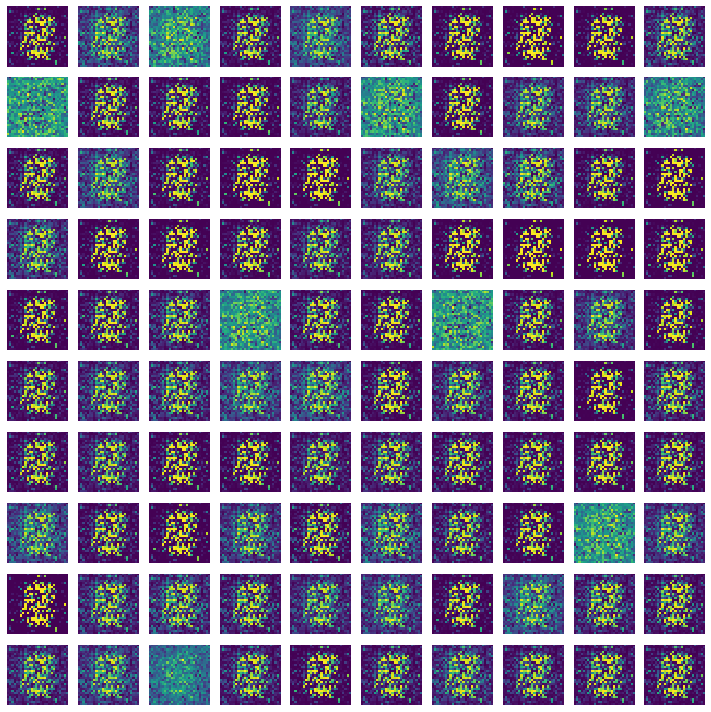

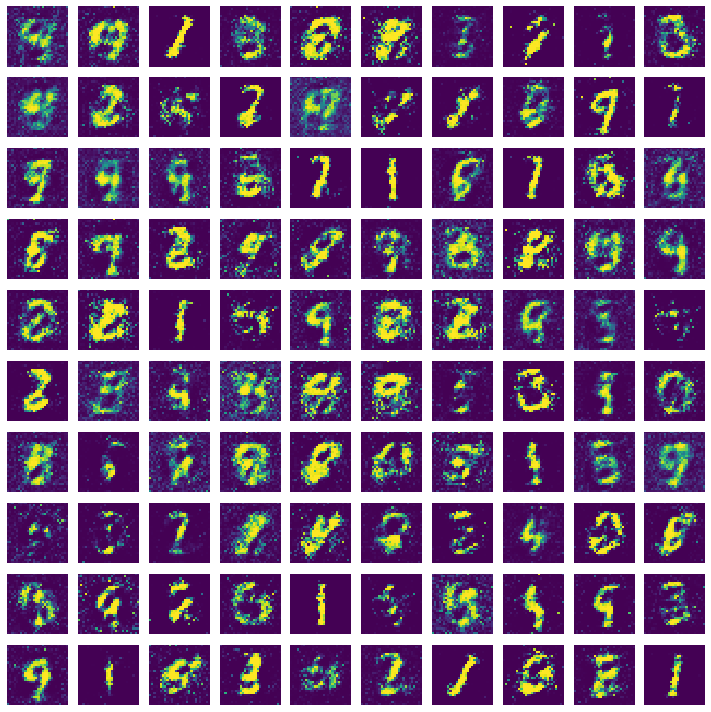

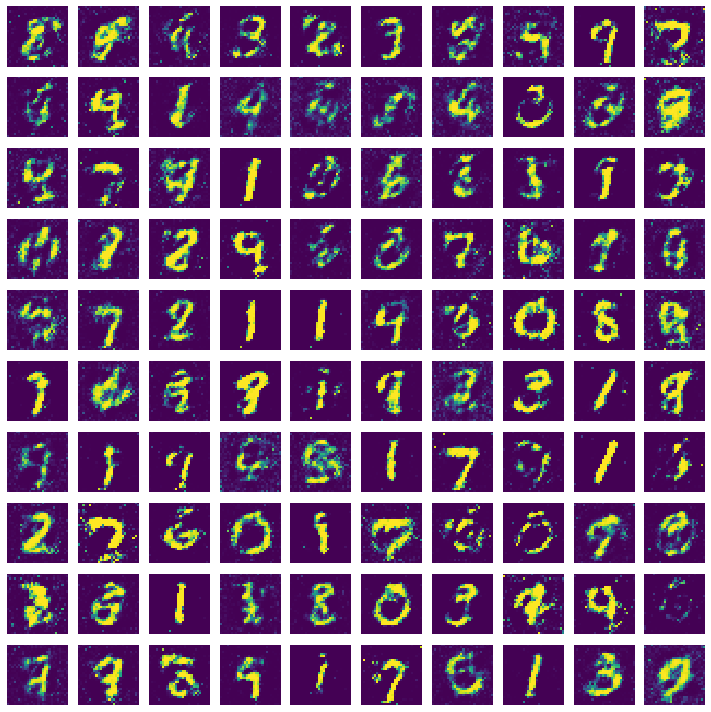

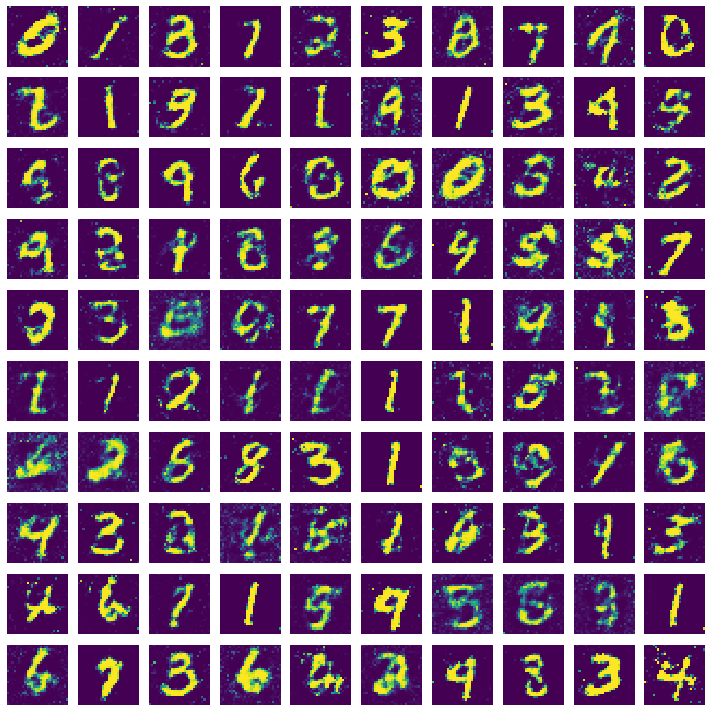

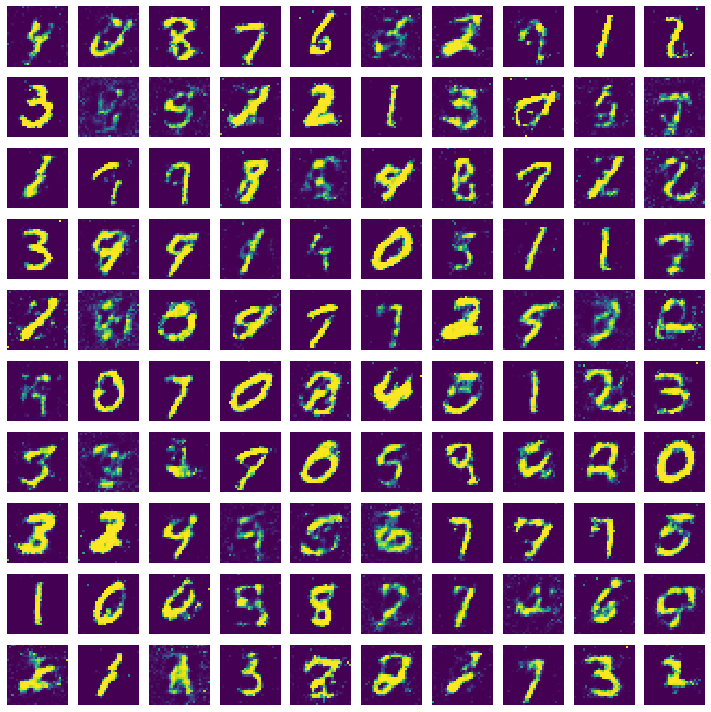

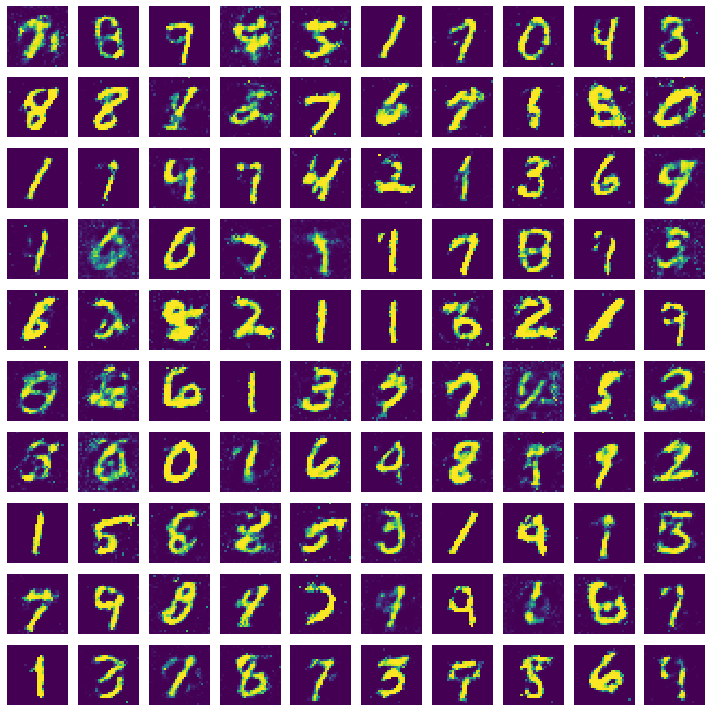

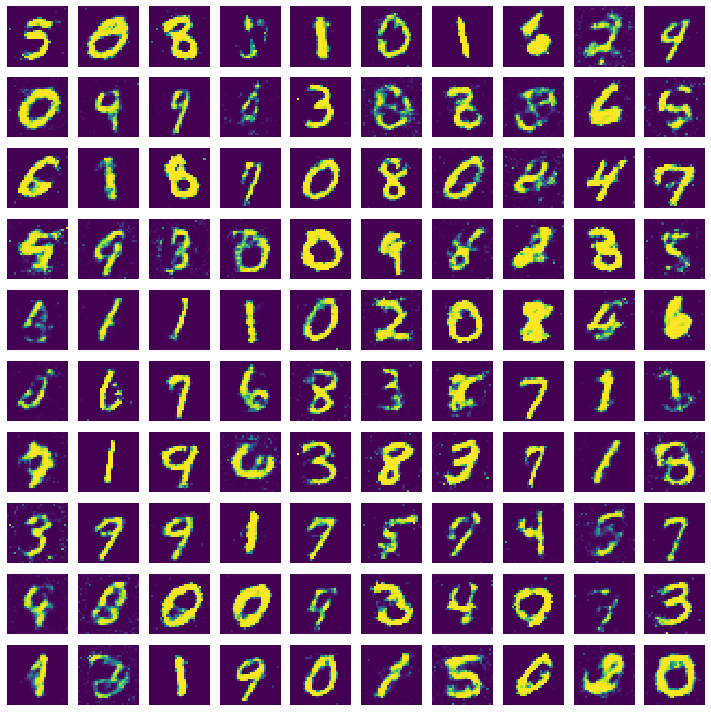

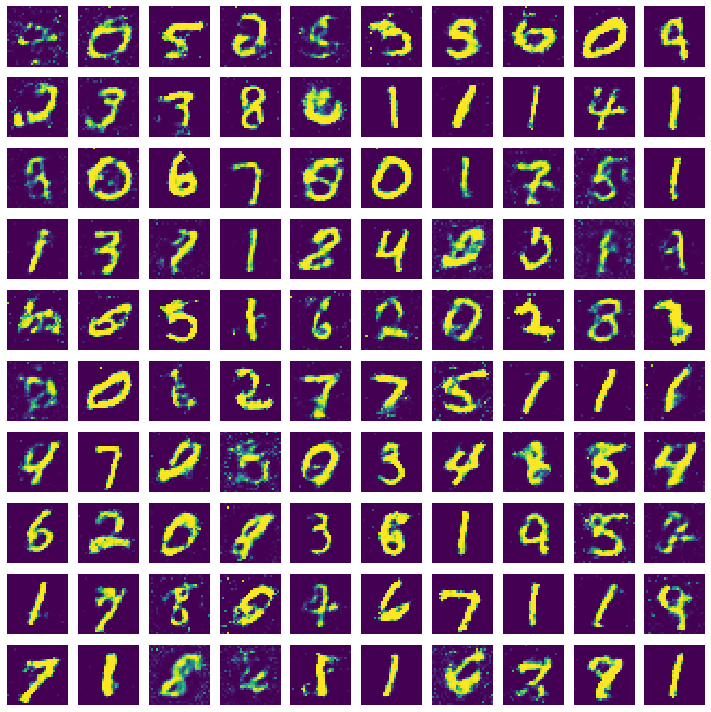

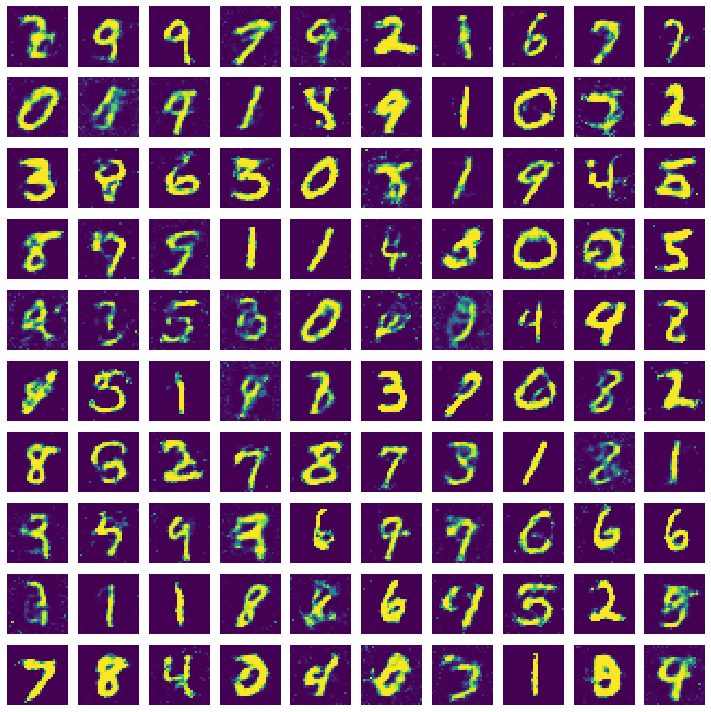

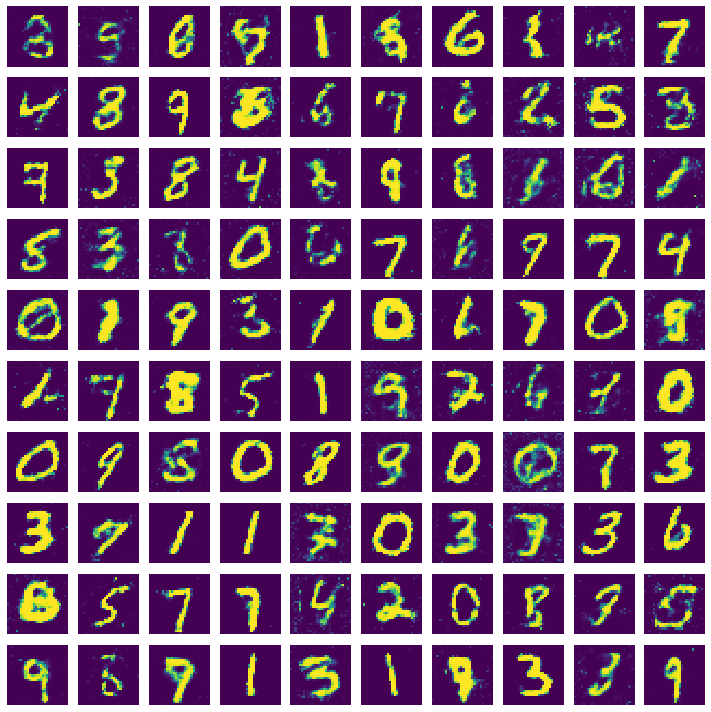

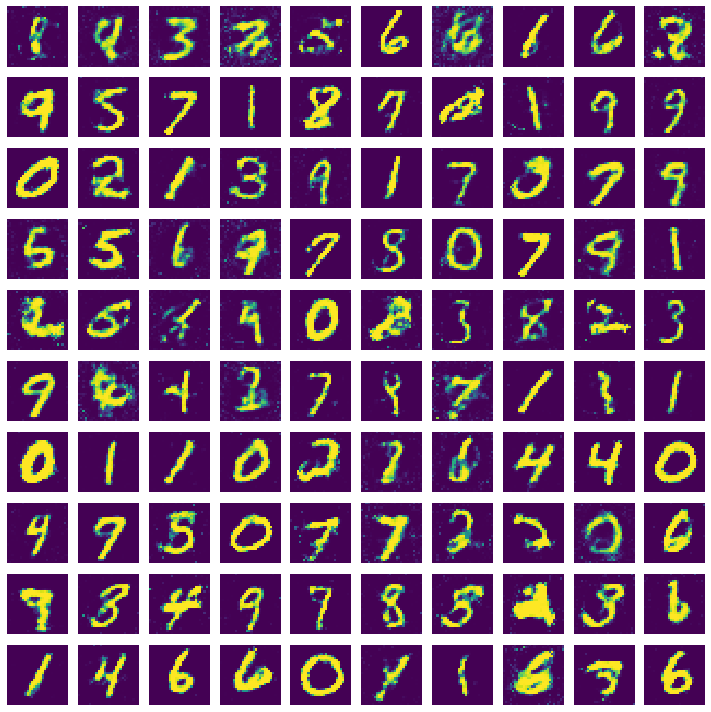

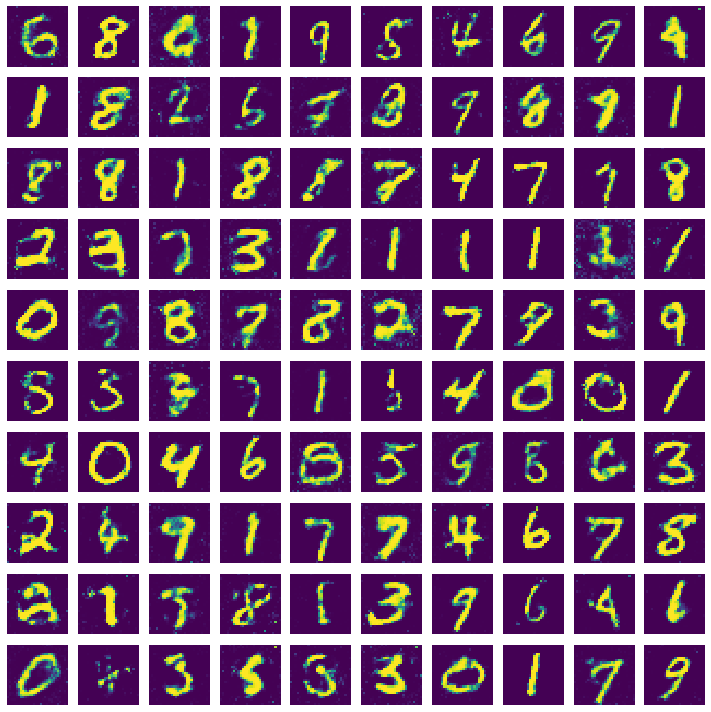

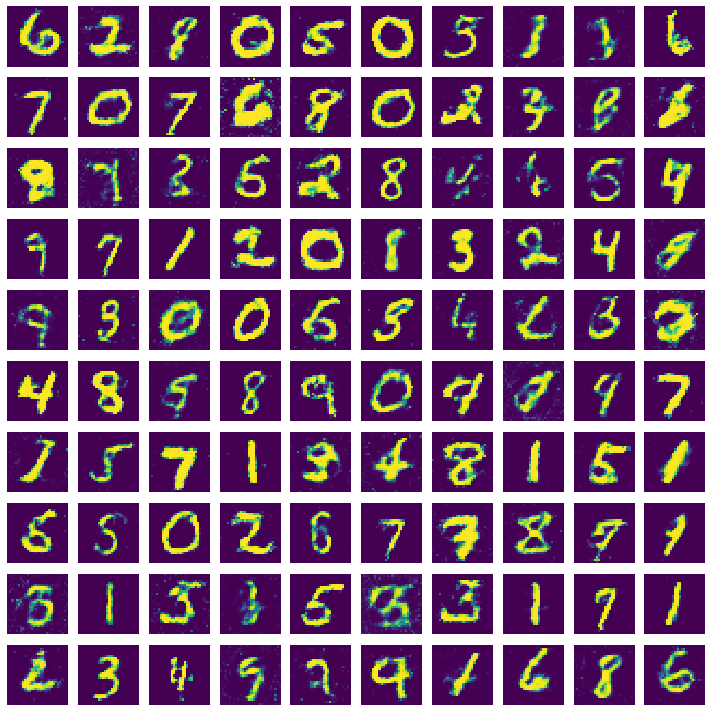

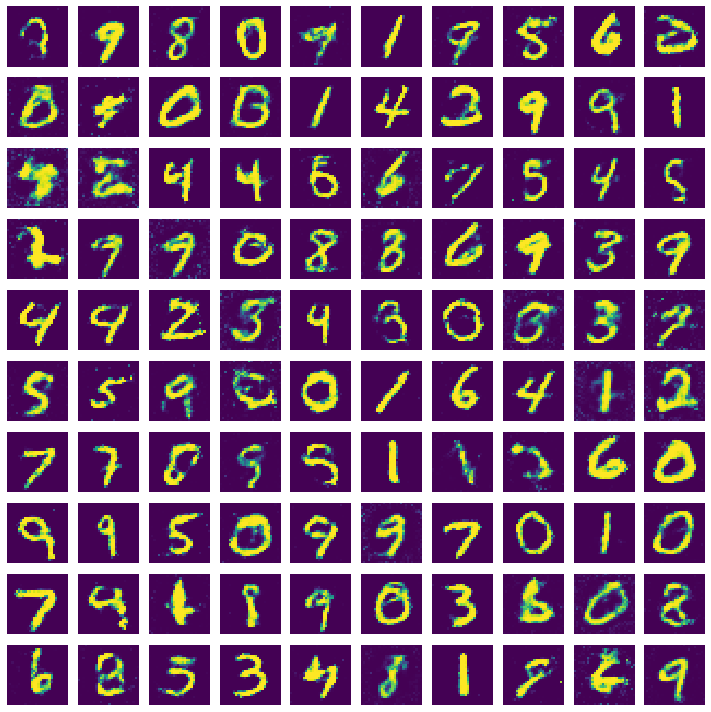

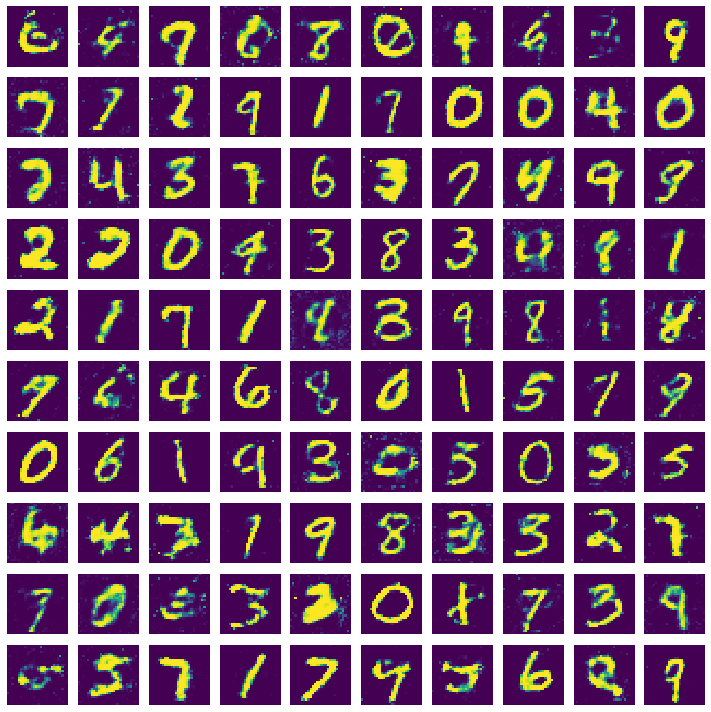

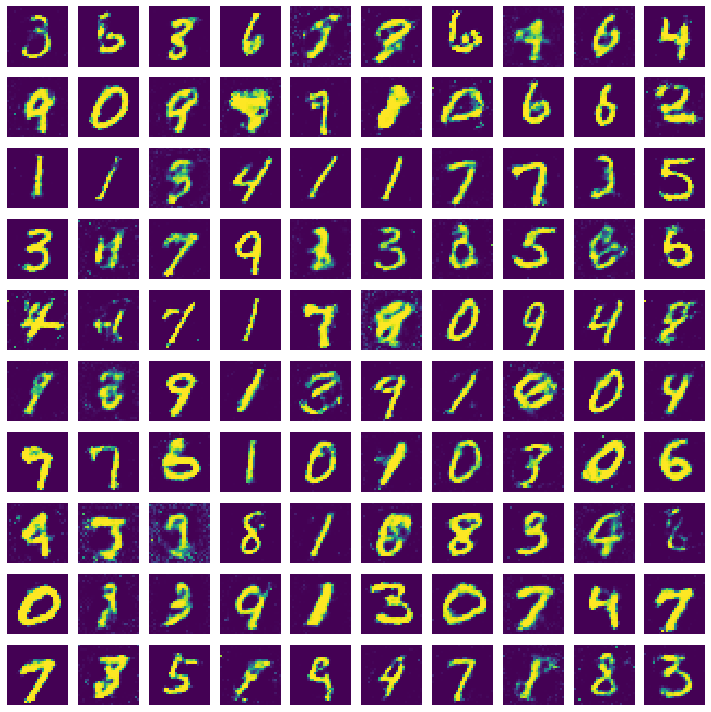

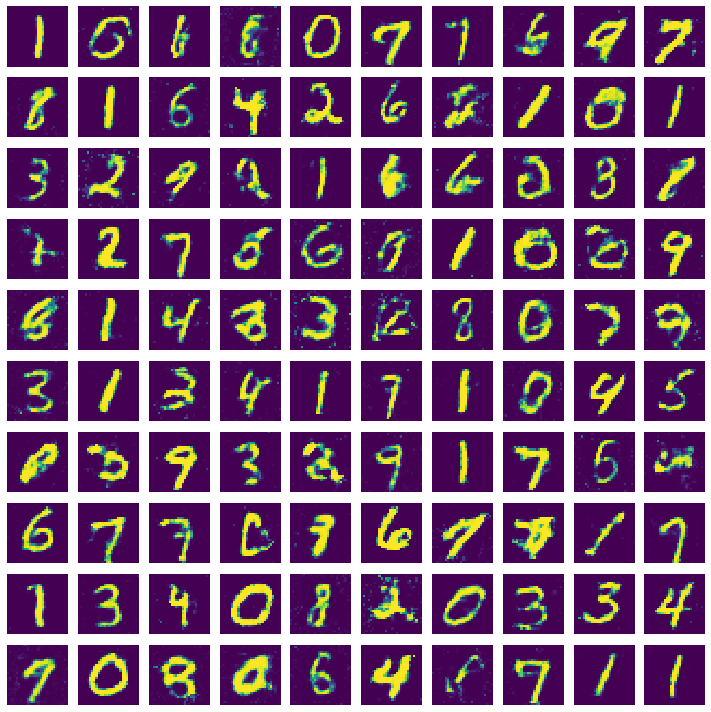

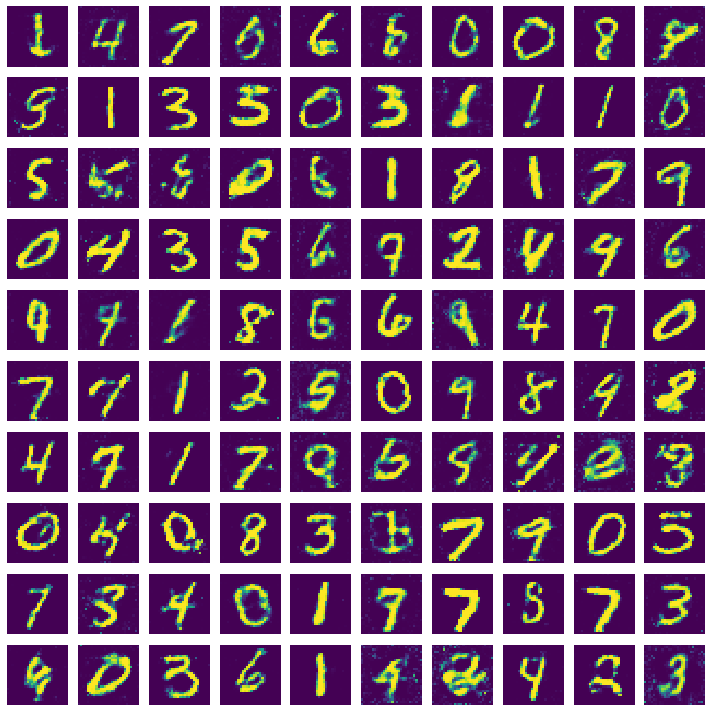

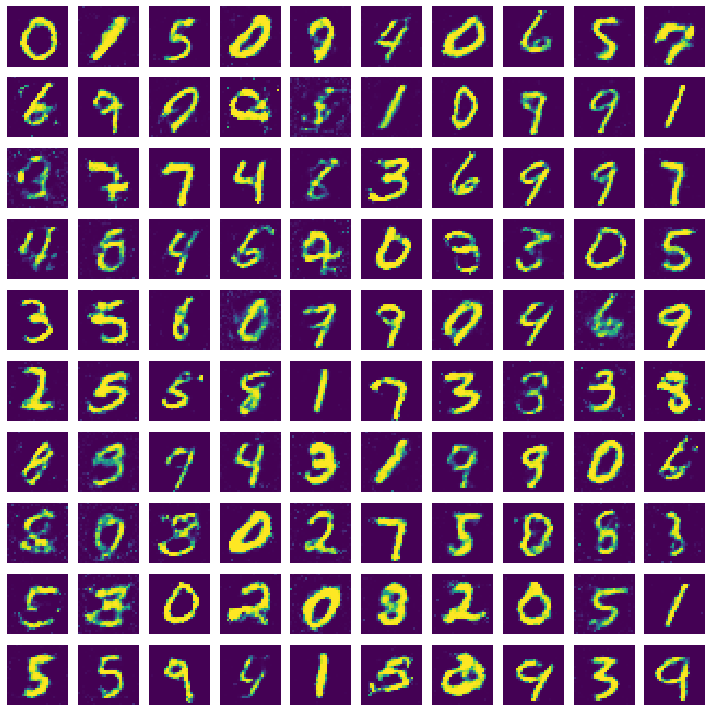

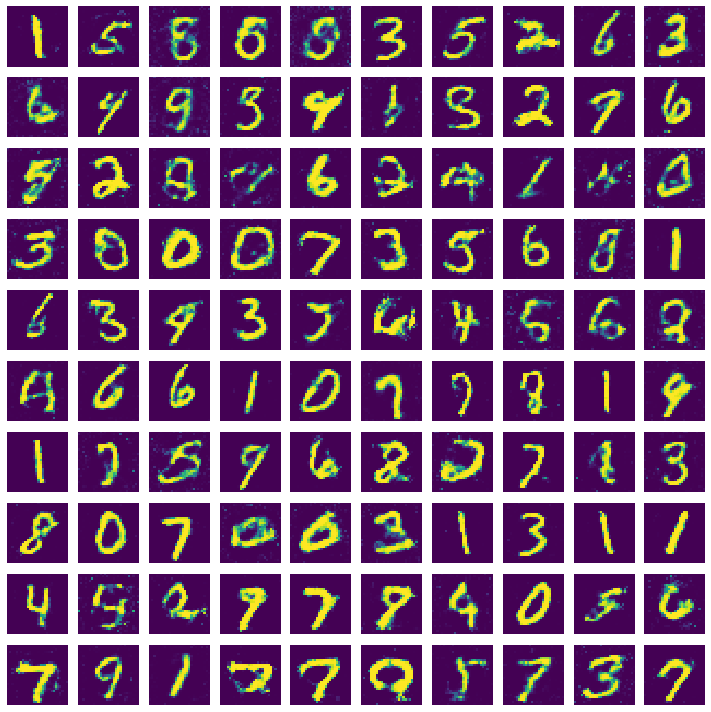

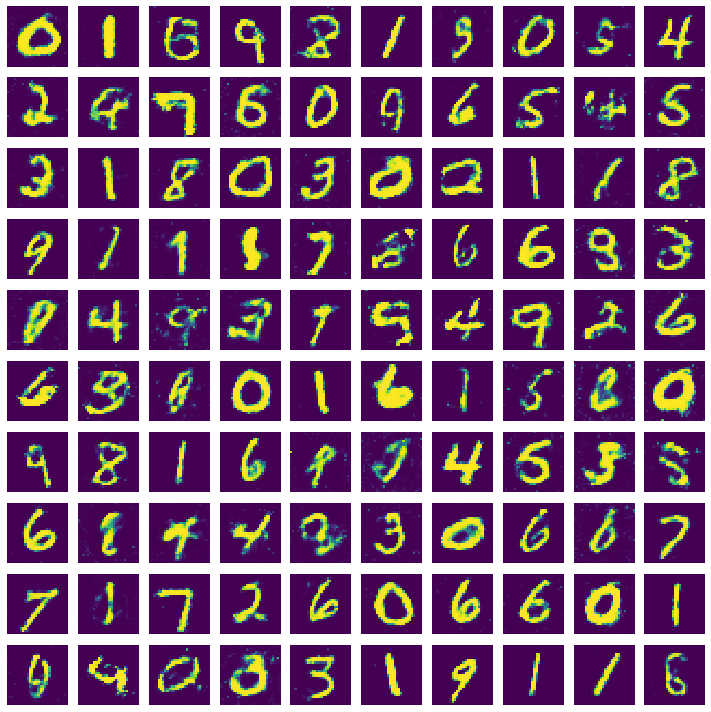

In [25]:
def training(epochs = 1, batch_size = 128):
    

  ## Data Loading
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size

  ## GANS creation
    generator = create_generator()
    discriminator = create_discriminator()
    gan = create_gan(discriminator, generator)

    for e in range(1, epochs+1):
        print("epochs %d" %e)

        for _ in tqdm(range(batch_size)):
            
      ## for each batch size creating random noise samples to initialize the generator
      
            noise = np.random.normal(0,1, [batch_size, 100])

      ## Generate the images
            generated_images = generator.predict(noise)

      ## Get a set of real images
            image_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

      ## Construct batches of real and fake data
            X = np.concatenate([image_batch, generated_images])

      ## Giving the labels to the for generated and real images
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9

      ## Train the discriminator on fake and real data before starting the GAN
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

      ## TRicking the noised input of the generator as real data
            noise = np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)

      ## Now for training GAN, the weights of the discriminator should be freeze
            discriminator.trainable = False

      ## Now training GAN by alternating the training of the discriminator (training GAN by freezing discriminator's weights)
            gan.train_on_batch(noise, y_gen)
        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)


training(400, 128)